# Derivatives

## Definition of Derivative
### Definition and Intuition

Let us recap from previous chapter. We have seen that the slope of a linear function $f(x)$ tells us the amount by which $f(x)$ increases given an increase in $x$ of $1$ unit. We also saw some economic examples of this concept, however, it would be useful to define it for **non-linear** functions as well.

Take the Cobb-Douglas production function defined in intensive units, $F(k) = k^{\alpha}$, where $k$ is the capital-labor ratio. How could we know how much production increases given an increase of one unit in the capital to labor ratio? That question can be addressed by using derivatives. The basic intuition of a derivative is the *rate of change* of a function with respect to a variable.

Suppose now we are studying a **non-linear** function $y = f(x)$ and that currently we are at the point $\left(x_0, f(x_0)\right)$ on the graph of $f$. If we want to measure the rate of change of $f$ or the steepness of the graph of $f$ when $x = x_0$ we could simply draw the tangent line to the graph of $f$ at $x_0$, since the tangent line approximates very closely the graph of $f$ **around** the point $\left(x_0, f(x_0)\right)$. Thus, the slope of the tangent line would be a good approximation for the rate of change of $f$ at that point.

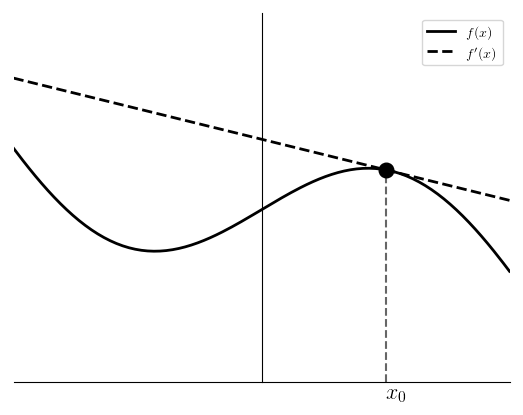

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc
rc('text', usetex = True)

from IPython.display import set_matplotlib_formats # So the image is saved vectorized
set_matplotlib_formats('png', 'pdf')

def f(x):
    return 0.6 * x * np.cos(x) + 1.4

xmin, xmax = -2, 2

x = np.linspace(xmin, xmax, 160)

y = f(x)

a = 1
h = 0.1

fprime = (f(a+h)-f(a)) / h
tan = f(a) + fprime * (x-a)


ya, yb = np.min(y), np.max(y)

fig, ax = plt.subplots()

for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')
for spine in ['right', 'top']:
    ax.spines[spine].set_color('none')
    
ax.set(ylim = (0, 3), xlim = (xmin, xmax),
       yticks = (), xticks = ())
    
ax.plot(x, y, 'k-', lw = 2, label = '$f(x)$')
ax.plot(x, tan, 'k--', lw = 2, label = "$f'(x)$")
ax.plot(a, f(a), 'ok', markersize = 10.5)
ax.text(a, -0.15, f'$x_0$',fontsize = 16)
ax.vlines(a, 0, f(a), linestyle = '--', alpha = 0.6)
plt.legend(loc = 'best')
plt.show()

So, the slope of a non-linear function $f$ at a point $\left(x_0,f(x_0)\right)$ on its graph is the slope of the tangent line to the graph of $f$ at that point. The **slope** of the tangent line to the graph of $f$ at $\left(x_0,f(x_0)\right)$ is called the **derivative** of $f$ at $x_0$.

However, we still lack a precise definition of *tangent line*. Let us start by defining a *secant line*.

Consider a function $f : \mathcal{D}\rightarrow\mathbb{R}$ and two points in its graph, $\left(x_0, f(x_0)\right),\left(x_1, f(x_1)\right)$. The line segment that joins these two points is called a *secant line*. From previous chapter, we can then define:

$$
y_1 - y_0 = m(x_1 - x_0) \ ; \  m = \frac{y_1 - y_0}{x_1 - x_0}
$$

Let us now back off a bit from $\left(x_0, f(x_0)\right)$ to $\left(x_0+h_1, f(x_0+h_1)\right)$ where $h_1$ is some small number. And let us draw a line $\ell_1$ joining these two points as in the following figure. Then, $\ell_1$ is an approximation to the tangent. Choose a smaller $h_2$ and draw the secant line ($\ell_2$) and repeat this procedure by choosing a sequence $\{h_n\}$ of small numbers converging monotonically to $0$. For each $n$, draw a secant line $\ell_n$ through the distinct points on the graph $\left(x_0, f(x_0)\right)$ and $\left(x_0+h_n, f(x_0+h_n)\right)$. The secant lines $\{\ell_n\}$ geometrically approach the tangent line to the graph of $f$ at $\left(x_0, f(x_0)\right)$ and their slopes approach the slope of the tangent line.

Since $\ell_n$ passes through the two points $\left(x_0, f(x_0)\right)$ and $\left(x_0+h_n, f(x_0+h_n)\right)$ its slope is:

$$
\frac{f(x_0 + h_n) - f(x_0)}{(x_0+h_n)-x_0} = \frac{f(x_0 + h_n) - f(x_0)}{h_n}
$$

Thus, the slope of the tangent line is the limit of this process as $h_n$ converges to $0$. Note that this is a process occurring in the *limit*, it is an infinite sequence of lines $\ell_n$ that appear as $h_n$ is becoming each time smaller and smaller.

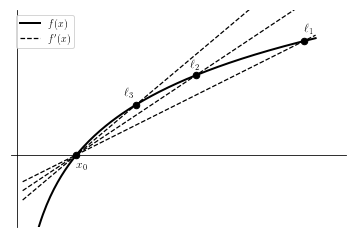

In [9]:
xmin, xmax = 0.1, 5

x = np.linspace(xmin, xmax, 160)

def g(x):
    return np.log(x)

y = g(x)

a = 1
h1 = 3.8
h2 = 2
h4 = 1

gp1 = (g(a+h1)-g(a)) / h1
gp2 = (g(a+h2)-g(a)) / h2
#gp3 = (g(a+h3)-g(a)) / h3
gp4 = (g(a+h4)-g(a)) / h4

tan1 = g(a) + gp1 * (x-a)
tan2 = g(a) + gp2 * (x-a)
#tan3 = g(a) + gp3 * (x-a)
tan4 = g(a) + gp4 * (x-a)


fig, ax = plt.subplots()

for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')
for spine in ['right', 'top']:
    ax.spines[spine].set_color('none')
    
ax.set(ylim = (-1, 2), xlim = (-0.1, xmax+0.5),
       yticks = (), xticks = ())
    
ax.plot(x, y, 'k-', lw = 2, label = '$f(x)$')
ax.plot(x, tan1, 'k--', lw = 1.25, label = "$f'(x)$")
ax.plot(x, tan2, 'k--', lw = 1.25, label = "$f'(x)$")
#ax.plot(x, tan3, 'k--', lw = 2, label = "$f'(x)$")
ax.plot(x, tan4, 'k--', lw = 1.25, label = "$f'(x)$")
ax.plot(a, g(a), 'ok', markersize = 6.5)
ax.plot(a+h1, g(a+h1), 'ok', markersize = 6.5)
ax.plot(a+h2, g(a+h2), 'ok', markersize = 6.5)
ax.plot(a+h4, g(a+h4), 'ok', markersize = 6.5)
ax.text(a, -0.2, f'$x_0$',fontsize = 12)
ax.text(a+h1, g(a+h1)+0.1, f'$\ell_1$', fontsize = 12)
ax.text(a+h2-0.1, g(a+h2)+0.08, f'$\ell_2$', fontsize = 12)
ax.text(a+h4-0.2, g(a+h4)+0.1, f'$\ell_3$', fontsize = 12)
ax.vlines(a, 0, g(a), linestyle = '--', alpha = 0.6)
plt.legend(loc = 'best')
plt.show()

**Definition:** Let $\left(x_0, f(x_0)\right)$ be a point on the graph of $y = f(x)$. The **derivative** of $f$ at $x_0$ denoted by

$$
f'(x_0) \ \text{or } \frac{df}{dx}(x_0) \ \text{or } \frac{dy}{dx}(x_0)
$$

is the slope of the tangent line to the graph of $f$ at $\left(x_0, f(x_0)\right)$. Analytically,

$$
f'(x_0) = \lim_{h\rightarrow 0} \frac{f(x_0 + h) - f(x_0)}{h}
$$

If the limit exists. When the limit **does exist**, we say that the function $f$ is **differentiable** at $x_0$ with derivative $f'(x_0)$.

### Computing a derivative using the definition

1. Compute the increment of the function $f(x_0 + h) - f(x_0)$.
2. Compute the slope as $\dfrac{f(x_0+h)-f(x_0)}{h}$
3. Compute the limit of the slope $\lim_{h\rightarrow 0}{\dfrac{f(x_0+h)-f(x_0}{h}}$

**Example:** Let's compute the derivative of $f(x) = x^2$ at $x_0 = 3$. To choose a sequence of $\{h_n\}$ converging to zero, let's use

$$
\{h_n\} = 0.1, 0.01, 0.001,\ldots,(0.1)^n,\ldots
$$

In [10]:
from tabulate import tabulate

def f(x):
    return x**2

h = np.ones((5, 1))

for n in range(0, len(h)):
    h[n] = 0.1**(n+1)

x0 = 3

xh = x0 + h
fxh = f(xh)
slope = (fxh-f(x0)) / h

table = np.hstack((h, xh, fxh, slope))
headers = [r"$h_n$", r"$x_0+h_n$", r"$f(x_0 + h_n)$", r"$\frac{f(x_0 + h_n)}{h_n}$"]
tab = tabulate(table, headers, tablefmt = "latex_booktabs")
print(tab)

\begin{tabular}{rrrr}
\toprule
   \$h\_n\$ &   \$x\_0+h\_n\$ &   \$f(x\_0 + h\_n)\$ &   \$\textbackslash{}frac\{f(x\_0 + h\_n)\}\{h\_n\}\$ \\
\midrule
  0.1    &     3.1     &          9.61    &                      6.1     \\
  0.01   &     3.01    &          9.0601  &                      6.01    \\
  0.001  &     3.001   &          9.006   &                      6.001   \\
  0.0001 &     3.0001  &          9.0006  &                      6.0001  \\
  1e-05  &     3.00001 &          9.00006 &                      6.00001 \\
\bottomrule
\end{tabular}


It is easy to show, using the steps above, that $f'(x) = 2x$ whatever $x$ is. Let us show that:

1. Increment:
$$
f(x_0 + h)-f(x_0) = (x_0+h)^2-x_0^2 = x_0^2+h^2+2x_0h-x_0^2 = 2x_0 h +h^2
$$
2. Slope:
$$
\frac{f(x_0+h)-f(x_0)}{h} = \frac{2x_0 h +h^2}{h} = 2x + h
$$
3. Limit:
$$
\lim_{h\rightarrow 0}{\frac{f(x_0+h)-f(x_0)}{h}} = \lim_{h\rightarrow 0}{2x+h} = 2x
$$

In a more general setting, let us show the following two results.

**Theorem:** For any positive integer $k$, the derivative of $f(x) = x^k$ at $x_0$ is $f'(x_0) = k x_0^{k-1}$

**Proof:**

\begin{align*}
\frac{(x_0+h)^k-x_0^k}{h} &= \frac{x_0^k+kx_0^{k-1} + \frac{1}{2}k(k-1)x_0^{k-2}h^2+\ldots+a_kh^k-x_0^k}{h} \\
&= \frac{h(kx_0^{k-1} + \frac{1}{2}k(k-1)x_0^{k-2}h + \ldots + a_k h^{k-1})}{h} \\
&= kx_0^{k-1}  + \frac{1}{2}k(k-1)x_0^{k-2}h + \ldots + a_k h^{k-1}
\end{align*}

Note that 
$$
\lim_{h\rightarrow 0}{kx_0^{k-1}  + \frac{1}{2}k(k-1)x_0^{k-2}h + \ldots + a_k h^{k-1}} = kx_0^{k-1}
$$

Previous Theorem uses the *binomial expansion* which we define next.

**Lemma:** For any positive integer $k$,
$$
(x + h)^k = x^k + a_1 x^{k-1}h^1+\ldots+a_{k-1}x^1 h^{k-1} + a_k h^k
$$

Where 

$$
a_j = \frac{k!\,}{j!\,(k-j)!\,} \ \text{for } j = 1, \ldots, k
$$

In particular, $a_1 = k, a_2 = k(k-1) / 2$, and $a_k = 1$.

### Tangent line of a graph in a point

Given a differentiable function $f : \mathcal{D}\rightarrow\mathbb{R}$ in a point $x_0\in\mathcal{D}$, the tangent line to the graph in the point $\left(x_0, f(x_0)\right)$ can be obtained from its slope $(m = f'(x_0))$ and the point it goes through. Thus, its equation will be given by 

$$
y - f(x_0) = f'(x_0)(x - x_0)
$$

**Example:** Given the function $f(x) = x^2$ in $x_0 = -1$:

1. $f'(x) = 2x$ (from before), thus $m = f'(-1) = -2$
2. To get the point, $\left(x_0, f(x_0)\right)$, $f(-1) = 1$.
3. Line that goes through $(-1,1)$ with slope $m = -2$ is given by
$$
y-1 = (-2)(x-(-1)) \Rightarrow y = -2x -1
$$

## Interpretation of the Derivative

We have said before that the derivative is a *rate of change*, more precisely, an *instantaneous rate of change* or growth of a function. As you will see, this concept is of crucial importance in economics.

### Macroeconomics
A production function of central importance in macroeconomics is the Cobb-Douglas production function. This function relates production (GDP) to some inputs. Suppose that the production per capita in a country is given by the per capita machines used. That is:

$$
y = f(k) = k^{\alpha}
$$

Where $y$ is output per capita, $k$ is capital (machines) per capita, and $\alpha\in(0,1)$ is a parameter denoting the share of income devoted to capital or capital intensity in production.

Suppose we would like to know by how much production changes if we add *an additional unit of capital per person*. That is given precisely by the concept of derivative. As we have proved before, the derivative of this production function is given by:

$$
f'(k) = \alpha k^{\alpha-1}
$$

Let's represent the production function and its derivative to draw some conclusions.

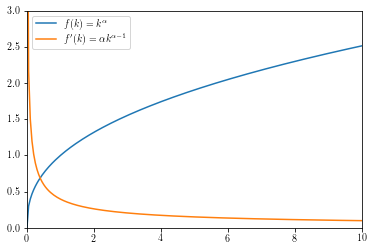

In [11]:
def cd(k, alpha):
    return k**alpha


def r(k, alpha):
    return alpha * k**(alpha-1)

kmin, kmax = 0, 10

k = np.linspace(kmin, kmax, 200)
kk = np.linspace(kmin+0.01, kmax, 200)

alpha = 0.4

y = cd(k, alpha)
r = r(kk, alpha)

fig, ax = plt.subplots()

ax.plot(k, y, '-', label = r"$f(k) = k^{\alpha}$")
ax.plot(k, r, '-', label = r"$f'(k) = \alpha k^{\alpha-1}$")
ax.set(ylim = (0, 3), xlim = (kmin, kmax))
plt.legend()
plt.show()

The graphs tell us that production increases with each unit of capital, but its derivative is downward sloped, which indicates that the *rate of growth* of production with each additional unit of capital is smaller.

This is the concept of diminishing returns to capital. When an economy does not have many machines per person, each additional one increases production per capita by a bigger fraction than when the economy has lots of machines per person. This is indicated by the derivative.

In the limit, when $k\rightarrow\infty$ production will not rise.

### Microeconomics

In theory of the firm in microeconomics, we typically deal with average and marginal costs. A cost function $c(q)$ indicates how much is the cost of producing $q$ units of a certain good. The *marginal cost* is the cost of producing an additional unit of the good. Average cost, instead, is defined as the total cost of producing $q$ units divided by the $q$ units so, it would give the cost per unit produced of the good.

Suppose the cost function is given by

$$
c(q) = bq^2 + cq + d
$$

Where $b, c,$ and $d$ are constant parameters. The marginal cost can be computed as:

1. Compute the increment:
$$
c(q+h)-c(q) = bh^2 + b2qh + ch
$$
2. Compute the slope:
$$
\frac{c(q+h)-c(q)}{h} = \frac{bh^2 + b2qh + ch}{h} = bh + 2bq + c
$$
3. Compute the limit:
$$
\lim_{h\rightarrow 0}{\frac{c(q+h)-c(q)}{h}} = \lim_{h\rightarrow 0}{bh + 2bq + c} = 2q + c
$$

Thus, the cost of an additional unit produced is $2q + c$ regardless of the amount produced $q$. However, the average cost is given by

$$
\frac{c(q)}{q} = bq + c + \frac{d}{q}
$$

Coefficient $d$ can be interpreted as a *sunk cost* which is a cost that you need to pay regardless of the amount you produce. Notice that coefficient $d$ does **not** affect the marginal cost, but it does affect the *average* cost. Can you rationalize that?

# Rules for Computing Derivatives

Recall the notation. If we assume $f(x) = x^3$ and $g(x) = 6x^2$

1. $$(f + g)(x) = f(x) + g(x) = x^3 + 6x^2$$
2. $$(f\cdot g)(x) = f(x)\cdot g(x) = x^3 6x^2 = 6x^5$$
3. $$\left(\frac{f}{g}\right) = \frac{f(x)}{g(x)} = \frac{x^3}{6x^2} = \frac{1}{6}x$$

**Theorem:** Suppose that $k$ is an arbitrary constant and that $f$ and $g$ are differentiable functions at $x = x_0$. Then:

1. $$(f\pm g)'(x_0) = f'(x_0) + g'(x_0)$$
2. $$(kf)'(x_0) = k\left(f'(x_0)\right)$$
3. $$(f\cdot g)'(x_0) = f'(x_0)g(x_0) + f(x_0)g'(x_0)$$
4. $$\left(\frac{f}{g}\right)'(x_0) = \frac{f'(x_0)g(x_0) - f(x_0)g'(x_0)}{g(x_0)^2}$$
5. $$\left(\left(f(x)\right)^n\right)' = n\left(f(x)\right)^{n-1}\cdot f'(x)$$
6. $$\left(x^k\right)' = kx^{k-1}$$

**Sketch of the Proof:** Parts $1$ and $2$ are straightforward to obtain by using the definition of derivative.
Part $3$ is obtained by using the definition and using $f(x_0)g(x_0+h) - f(x_0)g(x_0+h)$ in the numerator to factor and use the properties of limits to get the result. Part $4$ is almost analogous to Part $3$ just applying properties of limits. 

**Exercise:** Prove that the derivative of a constant is zero.

**Exercise:** Prove Theorem using the hints provided.

**Chain Rule:** The derivative of the composite function $(f\circ g)(x) = f(g(x))$ is given by:
$$
\left(f\circ g\right)'(x) = g'(x)f'\left(g(x)\right)
$$

### Derivatives of other Elemental Functions

- Natural log: $$\left(\ln(x)\right)' = \frac{1}{x}$$

**Proof:**
Let's start from the definition of the derivative:

\begin{align*}
f'(x_0) &= \lim_{h\rightarrow 0}{\frac{f(x_0+h)-f(x_0)}{h}} \\
&= \lim_{h\rightarrow 0}{\frac{\ln(x_0+h)-\ln(x_0)}{h}} \\
&= \lim_{h\rightarrow 0}{\frac{\ln\left(\frac{x_0 + h}{x_0}\right)}{h}} \\
&= \lim_{h\rightarrow 0}{\frac{1}{h}\ln\left(1+\frac{h}{x_0}\right)} \\
&= \lim_{h\rightarrow 0}{\left(1+\frac{h}{x_0}\right)^{\frac{1}{h}}} \\
\end{align*}

Let us define now:

$$
e = \lim_{h / x \rightarrow 0}{\left(1+h\right)^{\frac{x}{h}}} = \lim_{h / x\rightarrow 0}{\left(1+\frac{h}{x}\right)^{\frac{x}{h}}} = \lim_{h\rightarrow 0}{\left(1+\frac{h}{x}\right)^{\frac{x}{h}}}
$$

Where the last equality follows from the fact that $\frac{h}{x}\rightarrow 0$ as $h\rightarrow 0$ since $x$ is constant with respect to $h$.

Going back to the derivative, we can state that:

\begin{align*}
f'(x_0) = \lim_{h\rightarrow 0}{\frac{1}{h}\ln\left(e^{\frac{h}{x_0}}\right)} = \lim_{h\rightarrow 0}{\frac{1}{h}\frac{h}{x_0}\underset{=1}{\underbrace{\ln(e)}}} = \lim_{h\rightarrow 0}{\frac{1}{x_0}} = \frac{1}{x_0}
\end{align*}

- Exponential: $$\left(e^x\right)' = e^x$$

- Trigonometric:
$$
\left(\sin(x)\right)' = \cos(x) \ ; \ \left(\cos(x)\right)' = -\sin(x) \ ; \ \left(\tan(x)\right)' = \frac{1}{\left(\cos(x)\right)^2}
$$

**Exercise:** Prove that the derivative of the exponential function is the exponential function itself.

**Exercise:** Compute the derivative of the tangent function using the quotient rule (Theorem 1.4) and using the derivatives for the $\sin(x)$ and $\cos(x)$.

**Exercise:** Compute the derivative of $f(x) = \ln\left(\cos\left(x^2\right)\right)$

**Exercise:** The Constant Elasticity of Substitution production function can be defined as:

$$
f(k) = \left(a k^{\frac{\sigma-1}{\sigma}} + (1-a)\right)^{\frac{\sigma}{\sigma-1}}
$$

Where $k$ is the capital per person, $a$ is a distribution parameter, and $\sigma$ is the elasticity of substitution between capital and labor.

Using the rules for computing derivatives, prove that $f'(k) = a\left(\frac{f(k)}{k}\right)^{\frac{1}{\sigma}}$.

# Continuity and Differentiability

If a function $f : \mathcal{D}\rightarrow\mathbb{R}$ is differentiable in every $x_0\in\mathcal{D}$ we say it is **differentiable**. Only those functions whose graphs are *smooth curves* have tangent lines everywhere.

The following figure shows the graph for $f(x) = \lvert x \rvert$. Argue whether you believe the function is differentiable at $x = 0$ or not. Use the analytic definition of the derivative using the following two sequences that converge to zero:

$$
h_n = \{+0.1, +0.01,+0.001,\ldots,+(0.1)^n,\ldots\}
$$

$$
k_n = \{-0.1, -0.01,-0.001,\ldots,-(0.1)^n,\ldots\}
$$

What is the result you get? What do you think that implies? Recall from the previous Chapter on limits, what is the implication for a limit when its value is different when it is computed *from the left* and *from the right*?

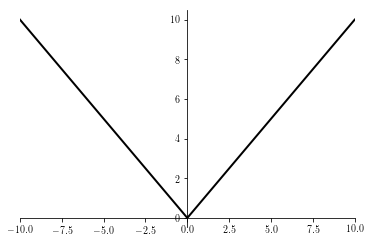

In [12]:
xmin, xmax = -10, 10

x = np.linspace(xmin, xmax, 300)

fig, ax = plt.subplots()

ax.plot(x, np.abs(x), '-k', lw = 2)
for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')
for spine in ['right', 'top']:
    ax.spines[spine].set_color('none')

ax.set_xlim((xmin, xmax))
plt.show()

## Continuous Functions

Geometrically, a function is **continuous** if it shows *no break points*. Is the previous function $f(x) = \lvert x \rvert$ continuous? What about $g(x)$ defined as follows?

$$
g(x) = \begin{cases}
x\phantom{^2}+1 & x \geq 0 \\
x^2-1 & x < 0 
\end{cases}
$$

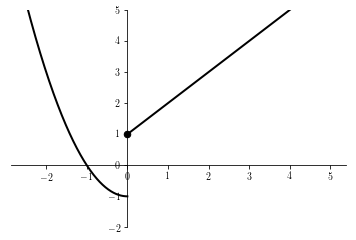

In [13]:
xmin, xmax = -2.5, 5
x1 = np.linspace(xmin, 0, 250)
x2 = np.linspace(0, xmax, 250)

g1 = x1**2 - 1
g2 = x2 + 1

fig, ax = plt.subplots()

ax.plot(x1, g1, '-k', lw = 2)
ax.plot(x2, g2, '-k', lw = 2)
ax.plot(0, 1, 'ok', markersize = 6.5)
for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')
for spine in ['right', 'top']:
    ax.spines[spine].set_color('none')
ax.set(ylim = (-2, 5))
plt.show()

Is it possible that this function shows a tangent line at $x = 0$? What is the implication of this result? How do we connect differentiability and continuity?

What is happening under $g(x)$ is that even if there are points in the $x-$axis that are arbitrarily close to each other, the values under $g$ are not close to each other. Even if $(-0.1)^n$ and $(+0.1)^n$ are arbitrarily close to each other, $g\left((-0.1)^n\right)$ is close to $-1$, while $g\left((+0.1)^n\right)$ is close to $1$. As $x$ crosses $0$ the function takes radically different values.

Do the same exercise as for $g(x)$ above but for:

$$
f(x) = \begin{cases}
x^3 & x>0 \\
x^2 & x\leq 0
\end{cases}
$$

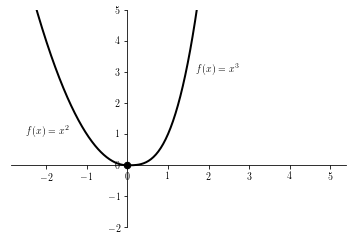

In [14]:
xmin, xmax = -2.5, 5

x1 = np.linspace(0, xmax, 250)
x2 = np.linspace(xmin, 0, 250)

f1 = x1**3
f2 = x2**2

fig, ax = plt.subplots()

ax.plot(x1, f1, '-k', lw = 2)
ax.plot(x2, f2, '-k', lw = 2)
ax.plot(0, 0, 'ok', markersize = 6.5)
for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')
for spine in ['right', 'top']:
    ax.spines[spine].set_color('none')
ax.set(ylim = (-2, 5))
ax.text(1.7, 3, r"$f(x) = x^3$")
ax.text(-2.5, 1, r"$f(x) = x^2$")
plt.show()

**Definition:** A function $f:\mathcal{D}\rightarrow\mathbb{R}$ is **continuous** at $x_0\in\mathcal{D}$ if for *any* sequence $\{x_n\}$ that converges to $x_0$ in $\mathcal{D}$, $f(x_n)$ converges to $f(x_0)$. A function is **continuous on a set** $\mathcal{U}\subset\mathcal{D}$ if it is continuous at every $x\in\mathcal{U}$. A function is continuous if it is continuous at every $x\in\mathcal{D}$.

**Theorem:** If $f : \mathcal{D}\rightarrow\mathbb{R}$ is differentiable at a point $x_0\in\mathcal{D}$, then it is also **continuous** at that point.

**Proof:** For the function to be differentiable, the following limit must exist:

$$
\lim_{h\rightarrow 0}\frac{f(x_0 + h) - f(x_0)}{h}
$$

Which implies that $f(x_0)$ exists. To show continuity, it must be that

$$
\lim_{x\rightarrow x_0}f(x) = \mathcal{L} = f(x_0)
$$

Therefore:

$$
\mathcal{L} = \lim_{x\rightarrow x_0}f(x) = \lim_{h\rightarrow 0}f(x_0 + h) = \lim_{h\rightarrow 0}f(x_0 + h)-f(x_0) + f(x_0) = \lim_{h\rightarrow 0}\left\{\frac{f(x_0+h)-f(x_0)}{h}h + f(x_0)\right\} = f'(x_0) \cdot 0 + f(x_0) = f(x_0)
$$

Thus, the function is continuous in $x = x_0$.


**Example:** Represent the graph of the Leontief production function. Suppose that a firm produces using capital and labor, however, it has a particular production structure. The firm's workers can *at most* use one machine per worker, that is, they can *share* machines or use each worker a single machine. That production function would be given by:

$$
q = min\left\{\frac{k}{a}, \frac{1}{b}\right\}
$$

Where $k$ is again machines per worker, $q$ is the production per worker of the firm, and $a,b$ are two positive constants.

- Is it continuous?
- Is it differentiable? Can we compute the *marginal product* of capital per worker?
- Can you think of an example where this production function **makes sense** economically?

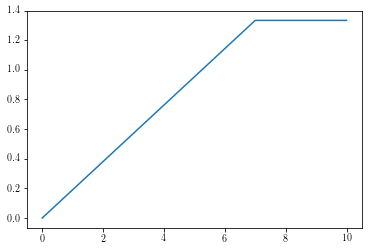

In [15]:
xmin, xmax = 0, 10

x = np.linspace(xmin, xmax, 300)
a = 5.25
b = 0.75

fig, ax = plt.subplots()

ax.plot(x, np.minimum(x / a, 1 / b))
plt.show()

# Some Important Results

**Theorem (Rolle's Theorem):** If $f:\mathcal{D}\rightarrow\mathbb{R}$ is continuous in the closed interval $[a,b]\subseteq\mathcal{D}$ and it is differentiable in the open interval $(a,b)\subseteq\mathcal{D}$, and it is also fulfilled that $f(a) = f(b)$, then there exists *at least* one point $c\in(a,b)$ such that $f'(c) = 0$.

**Proof:** There are two possibilities, 
- If $f(x)$ is constant on $[a,b]$, then $f'(c) = 0 \ \forall \ c\in[a,b]$.
- If $f(x)$ is **not** constant on $[a,b]$ then, by **Weierstrass' Theorem** it achieves a maximum or a minimum at some point $c\in[a,b]$. Let us assume without loss of generality that $f$ achieves a maximum. Then, for an $h\in\mathbb{R}$ such that $(c+h)\in[a,b]$, the value $f(c+h)$ must be smaller or equal to $f(c)$ since $f$ attains a maximum at $c$. Therefore, for every $h > 0$:

$$
\frac{f(c + h)-f(c)}{h} \leq 0
$$

Hence, 

$$
f'(c+) := \lim_{h\rightarrow 0^+}{\frac{f(c+h)-f(c)}{h}} \leq 0
$$

Similarly, for every $h < 0$:

$$
f'(c-) := \lim_{h\rightarrow 0^-}{\frac{f(c+h)-f(c)}{h}} \geq 0
$$

When these two limits agree, then the derivative of $f$ at $c$ must be $0$. Since the function is continuous in $[a,b]$ the two lateral limtis coincide, and thus, the function is differentiable.

**Theorem (L'Hôpital's Theorem):** Let $f,g : \mathcal{D} \rightarrow \mathbb{R}$ two differentiable functions such that $\lim_{x\rightarrow x_0} f(x) = \lim_{x\rightarrow x_0} g(x) = 0$. If the limit $\lim_{x\rightarrow x_0}{\frac{f'(x)}{g'(x)}}$ exists, then

$$
\lim_{x\rightarrow x_0}{\frac{f(x)}{g(x)}} = \lim_{x\rightarrow x_0}{\frac{f'(x)}{g'(x)}} = \mathcal{L}
$$

What this result shows is that, in certain limits, the functions can be replaced by their derivatives. To grasp the idea, it is as if we would change the functions by their slopes, in some way, it is a linear approximation.

The importance of this theorem comes also from the fact that it allows us to compute limits in which indeterminations appear. The following two examples show the power of this theorem.

**Example:** Compute the limit of

- $$\lim_{x\rightarrow 0}{\frac{\sin(x)}{x}}$$

It is clear that by substituting $x = 0$ in the limit we obtain an indetermination. However, taking the derivative of the numerator and the denominator separately:

$$
\lim_{x\rightarrow 0}{\frac{\cos(x)}{1}} = 1
$$

- $$\lim_{x\rightarrow 0}{\frac{x}{e^x}}$$

This second case is a bit more intuitive since the exponential function grows faster than the linear function, so the denominator will go faster to infinity than the numerator, which implies this limit is $0$. Using L'Hôpital's Theorem:

$$
\lim_{x\rightarrow +\infty}{\frac{1}{e^x}} = \frac{1}{+\infty} = 0
$$

- $$\lim_{x\rightarrow +\infty}{\left(1 + \frac{1}{x}\right)^x}$$

This is a more complicated limit since it would yield $1^{\infty}$, which is an indetermination. To deal with this type of limits, it is possible to transform them using the log of it. Thus, let 

$$
k = \lim_{x\rightarrow +\infty}{x\ln\left(1 + \frac{1}{x}\right)} = \lim_{x\rightarrow +\infty}{\frac{\ln\left(1 + \frac{1}{x}\right)}{\frac{1}{x}}} = \frac{0}{0}
$$

This yields another indetermination, but now it is possible to use L'Hôpital's theorem.

$$
k = \lim_{x\rightarrow +\infty}{\frac{\frac{-\frac{1}{x^2}}{1 + \frac{1}{x}}}{-\frac{1}{x^2}}} = \lim_{x\rightarrow +\infty}{\frac{1}{1 + \frac{1}{x}}} = 1
$$

Note however, that $k = 1$ is not the original limit but the **logarithm of the original limit**, thus, the actual value of the original limit is $e^k = e$.

# Implicit Differentiation

Typically, we work with *explicit* functions. That is, functions whose endogenous variables are explicit functions of the exogenous ones, i.e.

$$
y = F(x)
$$

Sometimes, however, functions may arise as **implicit** functions. That is, of the form:

$$
G(x, y) = 0
$$

This function $G(\cdot)$ defines de endogenous variable $y$ as an **implicit function** of $x$.

**Example:** When working with lines, we might have

$$
4x + 2y = 5 \ ; \ 4x + 2y - 5 = 0
$$

Which expresses $y$ as an implicit function of $x$. However, we can rearrange terms so that we have an *explicit* function of $x$:

$$
y = 2.5 - 2x 
$$

**Example:** It is not always possible to transform an implicit function into an explicit one. Consider, for example,

$$
y^5 - 2xy - 4x^2 = 0
$$

Since there is no general formula for solving an equation of $5-$th degree, we cannot turn this equation into an explicit function. Nevertheless, it does generate an implicit function of $x$, since we can plug any value for $x$ and obtain a value for $y$. Suppose $x = 0$, then $y^5 = 0 \Rightarrow y = 0$.

**Example:** Take now $x^2 + y^2 = 1$.

- If $x > 1$, then there is no $y$ possible that can satisfy the equation.
- If we start at some $(x_0, y_0)$ that is a solution to the equation, we can vary $x$ a little from $x_0$ and try to find $y$ close to $y_0$ that satisfies the equation, that would be $y = \sqrt{1-x^2}$.
Take $x = 0$, thus, $y = 1$. Then, small deviations from $x = 0$ yield small deviations in $y$ that fulfill the equation.
- Take now, $x = 1, y = 0$. Then, a small deviation $x = 1 + \varepsilon$ there is no possible $y$ so that $(1+\varepsilon,y)$ satisfies the equation.
- If, instead, we deviate to $x = 1-\varepsilon$, there are two possible candidates for $y$.
$$
y = \begin{cases}
+\sqrt{2\varepsilon-\varepsilon^2} \\
-\sqrt{2\varepsilon-\varepsilon^2}
\end{cases}
$$

That is because around $(1,0)$ the curve is vertical.

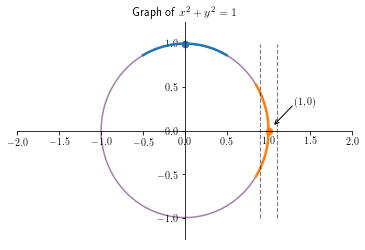

In [18]:
x = np.linspace(-1.0, 1.0, 250)
y = np.linspace(-1.0, 1.0, 250)

X, Y = np.meshgrid(x, y)
F = X**2 + Y**2 - 1

x1 = np.linspace(-0.5, 0.5, 250)
y1 = np.sqrt(1-x1**2)

x2 = np.linspace(0.85, 1, 250)
y2 = np.sqrt(1-x2**2)

y3 = -np.sqrt(1-x2**2)

fig, ax = plt.subplots()

ax.contour(X, Y, F, [0], alpha = 0.5)
ax.plot(x1, y1, '-', lw = 2.5)
ax.plot(x2, y2, '-', lw = 2.5)
ax.plot(x2, y3, '-', lw = 2.5, color = '#ff7f0e')
ax.plot(0, 1, 'o', color = '#1f77b4', markersize = 6.5)
ax.plot(1, 0, 'o', color = '#ff7f0e', markersize = 6.5)
ax.text(1.3, 0.3, r'$(1,0)$')
ax.annotate("", xy=(1.05, 0.05), xytext=(1.3, 0.3),
            arrowprops=dict(arrowstyle="->"))
ax.axvline(0.9, 0.1, 0.9, c = 'k', ls = '--', alpha = 0.5, lw = 1.15)
ax.axvline(1.1, 0.1, 0.9, c = 'k', ls = '--', alpha = 0.5, lw = 1.15)
ax.set(ylim = (-1.25, 1.25), xlim = (-2,2))
for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')
for spine in ['right', 'top']:
    ax.spines[spine].set_color('none')
    
plt.title('Graph of $x^2 + y^2 = 1$')
plt.show()

Suppose we want to know how changes in $x$ affect the corresponding $y$'s. That simply means that we want to know the change in $y$ when there is a given change in $x$, which is just the derivative of $y$ *with respect to $x$*.

To get the derivative of $y$ from a given implicit function, it is usually better to solve for $y$ first and then take the derivative as usual. Sometimes, as we have just seen, this is not possible but it might be possible to find the derivative in a point where the equation is satisfied.

Take the equation $x-y-\ln(x)-\ln(y) = 0$. This equation is satisfied in point $(1,1)$. So the process is about differentiating the equation with respect to $x$ such that we will get $\frac{dy}{dx} = y'$ and $\frac{dx}{dx} = 1$. Thus, we get:

$$
1 - \frac{dy}{dx}-\frac{1}{x}-\frac{1}{y}\frac{dy}{dx} = 1 - y' - \frac{1}{x}-\frac{y'}{y} = 0
$$

Substituting now $x = 1, y = 1$

$$
1 - y'(1) - 1 - y'(1) = 0 \Rightarrow y'(1) = 0
$$

In the Mathematics Course you will see more on implicit differentiation. In particular, the **Implicit Function Theorem** stated below.

**Theorem (Implicit Function Theorem):** Let $G(x, y)$ be a $\mathcal{C}^1$ (continuous and differentiable function whose first derivatives are also continuous) function on a ball about $(x_0, y_0)\in\mathbb{R}^2$. Suppose $G(x_0, y_0) = c$ and consider the expression

$$
G(x, y) = c
$$

If $\left(\partial G / \partial y\right)(x_0, y_0) \neq 0$ then there exists a $\mathcal{C}^1$ function $y = y(x)$ defined on an interval $\mathcal{I}$ about the point $x_0$ such that:
- $$G\left(x,y(x)\right) = c \ \forall \ x\in\mathcal{I}$$
- $$y(x_0) = y_0$$
- $$y'(x_0) = -\frac{\frac{\partial G}{\partial x}(x_0, y_0)}{\frac{\partial G}{\partial y}(x_0, y_0)}$$


The **Implicit Function Theorem** is a central result in mathematical analysis and of central importance for economic theory as you will see. It gives answers to two main questions about implicit functions:

1. Given an implicit equation $G(x,y) = c$ and a point $(x_0, y_0)$ such that the equation is satisfied, does there exist a continuous function $y = y(x)$ defined on an interval $\mathcal{I}$ about $x_0$ so that $G\left(x, y(x)\right) = c \ \forall \ x\in\mathcal{I}$ and for which $y(x_0) = y_0$?
2. If $y(x)$ exists and is differentiable, what is $y'(x_0)$?

Basically, 1 asks whether the implicit function exists and is continuous about that point where the equation is satisfied and 2 asks for a way of computing the derivative of this implicit function at that point where the equation is satisfied. This theorem also exists in a multivariate case.

# Maxima and Minima

## Increasing and Decreasing Functions

Recall that the definition of a derivative is the slope of the tangent line on a point. What is the implication if the slope is positive? This tells us that the function on that point is *growing*, while if the slope of the tangent is negative, it is telling us that the function is *decreasing* on that point. More precisely,

**Definition:** A function $f(x)$ is said to be **increasing** in an interval $[a,b]$ if:
$$
\forall \ x_1,x_2\in[a,b] \ : \ x_1 < x_2 \Rightarrow f(x_1) < f(x_2)
$$

Analogously, a function is said to be **decreasing** in an interval $[a,b]$ if:

$$
\forall \ x_1,x_2\in[a,b] \ : \ x_1 < x_2 \Rightarrow f(x_1) > f(x_2)
$$

These concepts are most important in the case of non-linear functions because straight lines are *always* increasing or decreasing. Take $f(x) = \sin(x)$, this function will have intervals in which $f(x)$ increases as $x$ increases and other intervals in which $f(x)$ decreases as $x$ *increases*. The following Figure helps to see the relationship between derivatives and intervals of growth of a function.

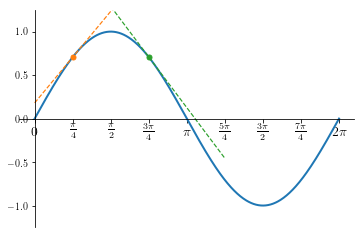

In [19]:
x = np.linspace(0, 2 * np.pi, 500)
y = np.sin(x)


a = np.pi / 4
h1 = 0.1

fp1 = (np.sin(a+h1)-np.sin(a)) / h1
tan1 = np.sin(a) + fp1 * (x-a)

b = (np.pi * 3) / 4
fp2 = (np.sin(b+h1)-np.sin(b)) / h1
x2 = np.linspace(np.pi / 2, (5 * np.pi) / 4, 100)
tan2 = np.sin(b) + fp2 * (x2-b)

fig, ax = plt.subplots()
ax.plot(x, y, '-', lw = 2)
ax.plot(x,tan1,'--', lw = 1.2)
ax.plot(x2,tan2,'--', lw = 1.2)
ax.plot(a, np.sin(a), 'o', markersize = 5, color = '#ff7f0e')
ax.plot(b, np.sin(b), 'o', markersize = 5, color = '#2ca02c')
for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')
for spine in ['right', 'top']:
    ax.spines[spine].set_color('none')

xlabels = [r"$0$", r"$\frac{\pi}{4}$",   r"$\frac{\pi}{2}$", r"$\frac{3\pi}{4}$", r"$\pi$", r"$\frac{5\pi}{4}$", r"$\frac{3\pi}{2}$", r"$\frac{7\pi}{4}$", r"$2\pi$"]
x_tick = np.linspace(0, 1, 9)
ax.set_xticks(x_tick * 2 * np.pi)
ax.set_xticklabels(xlabels, fontsize = 14)
ax.set_ylim((-1.25, 1.25))
plt.show()

From the graph, it is easy to see the relationship between derivatives and areas in which the function is increasing or decreasing. The following Theorem summarizes and formalizes this idea.

**Theorem:** Given a function $f \ : \ \mathcal{D}\rightarrow\mathbb{R}$ such that $f\in\mathcal{C}^1$, then:
1. $f(x)$ is **increasing** for every $x\in\mathcal{D} \ : \ f'(x) \geq 0$
2. $f(x)$ is **decreasing** for every $x\in\mathcal{D} \ : \ f'(x) \leq 0$

**Exercise:** Analyse the areas in which $f(x) = 2x^2 - 1$ is increasing and decreasing. To do so, first compute its derivative, then compute those points for which $f'(x) = 0$. Finally, analyse the sign in those intervals given by the cut-points of the derivative.

**Exercise:** Do the same for $g(x) = x^3-4x^2+2$.

## Local Maxima and Minima

From the discussion above, it is straightforward to see that if in a point $x_0$ the function achieves a *local maximum*, it must be **increasing** for those $x < x_0$ and **decreasing** for those $x > x_0$. If the derivative exists and it is continuous it will turn from being positive to being negative while in that particular point $x_0$ it will be $0$. If $x_0$ is a local minimum instead, the reasoning is equivalent and the derivative **must also be zero** at that point. Those points that make the first derivative $0$ are called *critical points*.

**Definition:** If $f \ : \ \mathcal{D}\rightarrow\mathbb{R}$ and $f\in\mathcal{C}^1$, those points for which $f'(x) = 0$ are called **critical or stationary points**.

**Theorem:** If $f \ : \ \mathcal{D}\rightarrow\mathbb{R}$ and $f\in\mathcal{C}^1$. Then, every point in which $f(x)$ reaches a local maximum or minimum are critical points. Furthermore:
- If $f'(x_0) = 0$ and the function turns from increasing to decreasing, $f(x)$ reaches a local maximum at $x_0$
- If $f'(x_0) = 0$ and the function turns from decreasing to increasing, $f(x)$ reaches a local minimum at $x_0$

Note that **not every critical point must be a local maximum or minimum**. 

**Example:** Analyse the areas in which the function $f(x) = x^3$ is increasing or decreasing.

$f'(x) = 3x^2$, so the only point for which $f'(x) = 0$ is $x = 0$. However, notice that for any $x < 0$, $f'(x) > 0$ and so it is for any $x > 0$. Thus, $x = 0$ is neither a maximum or a minimum. This is the case of a *saddle point*. Graphically:

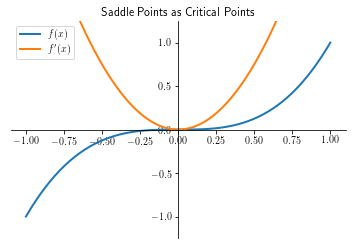

In [20]:
x = np.linspace(-1.0, 1.0, 250)

def f(x):
    return x**3

def fp(x):
    return 3*x**2

fig, ax = plt.subplots()
ax.plot(x, f(x), '-', lw = 2, label = r"$f(x)$")
ax.plot(x, fp(x), '-', lw = 2, label = r"$f'(x)$")
for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')
for spine in ['right', 'top']:
    ax.spines[spine].set_color('none')
ax.set_ylim((-1.25, 1.25))
plt.legend(loc = 'best')
plt.title('Saddle Points as Critical Points')
plt.show()

# Convexity and Concavity

Convexity and concavity refer basically to the *curvature* of a function, how the function it is shaped. Let us start with an example by thinking about a firm's production function. Assume a firm produces with a single input, it is reasonable to assume that the total amount of output produced by the firm increases with this input, i.e., as we increase the input (e.g. machines) the output of the firm will be larger. This relates to the function being *increasing* on that input. However, as we increase the input, typically the output increases but each time by a little less. That idea can be captured in a production function that is both increasing in the input and also **concave**. Suppose now that the cost of a firm is concave up to a point in which it becomes convex. That would tell us that the cost of producing increases each time by a smaller amount as we increase the amount to be produced up to a point, in which the cost raises every time faster and faster. The figure below shows both examples.

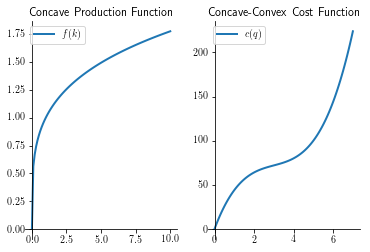

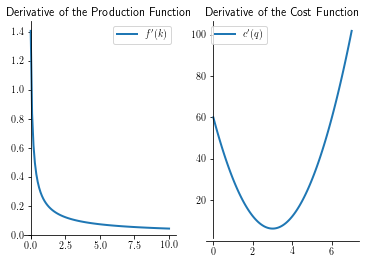

In [19]:
k = np.linspace(0, 10, 100)
kk = np.linspace(0.1, 10, 100)
q = np.linspace(0, 7, 100)
α = 1/4
pf = k**α
pfp = α * kk**(α-1)

cf = 2*q**3 - 18*q**2 + 60*q
cfp = 6*q**2 - 2*18*q + 60

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.plot(k, pf, '-', lw = 2, label = r"$f(k)$")
for spine in ['left', 'bottom']:
    ax1.spines[spine].set_position('zero')
for spine in ['right', 'top']:
    ax1.spines[spine].set_color('none')
ax1.set_title('Concave Production Function')
ax1.legend(loc = 'best')

ax2.plot(q, cf, '-', lw = 2, label = r"$c(q)$")
for spine in ['left', 'bottom']:
    ax2.spines[spine].set_position('zero')
for spine in ['right', 'top']:
    ax2.spines[spine].set_color('none')
ax2.set_title('Concave-Convex Cost Function')
ax2.legend(loc = 'best')

fig2, (ax3, ax4) = plt.subplots(1, 2)

ax3.plot(k, pfp, '-', lw = 2, label = r"$f'(k)$")
for spine in ['left', 'bottom']:
    ax3.spines[spine].set_position('zero')
for spine in ['right', 'top']:
    ax3.spines[spine].set_color('none')
ax3.set_title('Derivative of the Production Function')
ax3.legend(loc = 'best')

ax4.plot(q, cfp, '-', lw = 2, label = r"$c'(q)$")
for spine in ['left', 'bottom']:
    ax4.spines[spine].set_position('zero')
for spine in ['right', 'top']:
    ax4.spines[spine].set_color('none')
ax4.set_title('Derivative of the Cost Function')
ax4.legend(loc = 'best')
plt.show()

In the previous two examples, we have made reference to how much output or cost increase given an increase in the input of the function. This is already suggesting we should look at the derivatives of the function since the derivative tells us precisely by how much the function increases if the argument of the function increases (infinitesimally).

Note how the derivatives of these functions show up. For concave functions, the derivative is decreasing, while note that for the cost function, when it becomes convex, the derivative turns from decreasing to increasing.

## Definition and Alternative Graph Representation

A formal definition of convexity and concavity is given below.

**Definition:** A function $f \: : \: \mathcal{D} \rightarrow \mathbb{R}$ is said to be:
- **convex** in the interval $[a,b]\subseteq\mathcal{D}$ if $\forall \: x,y\in[a,b]  \: x\neq y$ and $\forall \: \lambda\in[0, 1]$ it is fulfilled that $f\left(\lambda x + (1-\lambda)y\right) \leq \lambda f(x) + (1-\lambda) f(y)$. It will be *strictly* convex if $f\left(\lambda x + (1-\lambda)y\right) < \lambda f(x) + (1-\lambda) f(y)$.
- **concave** in the interval $[a,b]\subseteq\mathcal{D}$ if $\forall \: x,y\in[a,b] \: x\neq y$ and $\forall \: \lambda\in[0,1]$ it is fulfilled that $f(\lambda x + (1-\lambda) y)\geq \lambda f(x) + (1-\lambda) f(y)$. It will be *strictly* concave if $f\left(\lambda x + (1-\lambda)y\right) > \lambda f(x) + (1-\lambda) f(y)$.

Note that, in general, functions do not need to be concave or convex in all their domain (recall the example of the cost function) but they tend to have areas of convexity and areas of concavity. These areas are determined by the sign of the second derivative of the function.

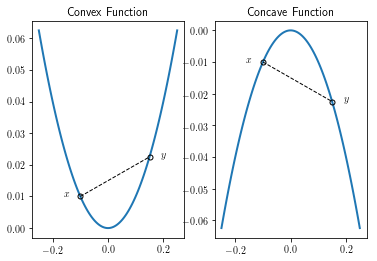

In [73]:
def convex(x):
    return x**2

def concave(x):
    return -convex(x)

x = np.linspace(-0.25, 0.25, 100)
x0 = -0.1
x1 = 0.15
λ = 0.5


fig, (ax1, ax2) = plt.subplots(1, 2, sharex = True)

ax1.plot(x, convex(x), '-', lw = 2)
ax1.plot([x0, x1],[convex(x0), convex(x1)], '--', color = 'black', lw = 1)
ax1.plot(x0, convex(x0), 'o', markersize = 5, markeredgecolor = 'black', markerfacecolor = 'None')
ax1.plot(x1, convex(x1), 'o', markersize = 5, markeredgecolor = 'black', markerfacecolor = 'None')
ax1.text(x0 + x0 / 2, convex(x0), r"$x$", horizontalalignment = 'center')
ax1.text(x1 + x1 / 3, convex(x1), r"$y$", horizontalalignment = 'center')
ax1.set_title('Convex Function')

ax2.plot(x, concave(x), '-', lw = 2)
ax2.plot([x0, x1],[concave(x0), concave(x1)], '--', color = 'black', lw = 1)
ax2.plot(x0, concave(x0), 'o', markersize = 5, markeredgecolor = 'black', markerfacecolor = 'None')
ax2.plot(x1, concave(x1), 'o', markersize = 5, markeredgecolor = 'black', markerfacecolor = 'None')
ax2.text(x0 + x0 / 2, concave(x0), r"$x$", horizontalalignment = 'center')
ax2.text(x1 + x1 / 3, concave(x1), r"$y$", horizontalalignment = 'center')
ax2.set_title('Concave Function')
plt.show()

Note how the formal definition is directly related to the graphs above. Take any $x < z < y$, then if the point $\left(z, f(z)\right)$ on the graph of $f(\cdot)$ is below (above) the segment joining $\left(x, f(x)\right)$ and $\left(y, f(y)\right)$ the function is convex (concave).

**Theorem:** Let $f \: : \: \mathcal{D}\rightarrow\mathbb{R}$ be a function with continuous first and second derivatives in all its domain. Then:
1. $f(x)$ is concave in $[a,b]$ if $f''(x) \leq 0 \: \forall \: x\in[a,b]$
2. $f(x)$ is convex in $[a,b]$ if $f''(x) \geq 0 \: \forall \: x\in[a,b]$

Let's build a bit of intuition on this theorem. If $f'(x)$ measures the *rate of change* of $f(\cdot)$, by the same token, the second derivative measures the *rate of change of the first derivative*. Let us assume that we find a particular function whose **second** derivative is negative. This will imply that the *first* derivative is declining, which in turn, will tell us that the function itself increases by a lower amount with each increase in the argument. In other words, if we have a positive *first* derivative and a negative *second* derivative, that would imply that the slope of the function is positive but *decreasing* (Point $A$ in the Figure below). If, instead, the second derivative is *positive*, the function would have a positive and *increasing* slope (Point $F$). 

Suppose now that the first derivative is *negative*. Thus, a *positive* second derivative would tell us that the function has a negative and *increasing* slope. What does increasing mean in this case? Precisely that the function becomes ***less steep*** since the slope would change from say, $(-5)$ to $(-2)$ (Point $D$). If the second derivative is instead *negative* that would imply a function with a negative and *decreasing* slope. Analogously, in this case, *decreasing* means that the function is becoming ***more steep*** (Point $C$).

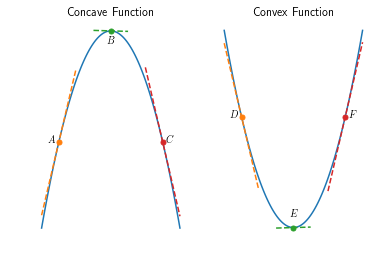

In [83]:
x = np.linspace(-1, 1, 100)
xtan1 = np.linspace(-1, -0.5, 100)
xtan2 = np.linspace(-0.25, 0.25, 100)
xtan3 = np.linspace(0.5, 1, 100)

A = -0.75
B = 0.0
C = 0.75

h = 0.01

conc1 = (concave(A+h) - concave(A)) / h
conc2 = (concave(B+h) - concave(B)) / h
conc3 = (concave(C+h) - concave(C)) / h

tconc1 = concave(A) + conc1 * (xtan1 - A)
tconc2 = concave(B) + conc2 * (xtan2 - B)
tconc3 = concave(C) + conc3 * (xtan3 - C)

conv1 = (convex(A+h) - convex(A)) / h
conv2 = (convex(B+h) - convex(B)) / h
conv3 = (convex(C+h) - convex(C)) / h

tconv1 = convex(A) + conv1 * (xtan1 - A)
tconv2 = convex(B) + conv2 * (xtan2 - B)
tconv3 = convex(C) + conv3 * (xtan3 - C)


fig, (ax1, ax2)  = plt.subplots(1, 2, sharex = True)
ax1.plot(x, concave(x), '-', label = r"Concave")
ax1.plot(xtan1, tconc1, '--', label = r"A")
ax1.plot(A, concave(A), 'o', markersize = 5, color = '#ff7f0e')
ax1.text(A - 0.1, concave(A), r"$A$", horizontalalignment='center')
ax1.plot(xtan2, tconc2, '--', label = r"B")
ax1.plot(B, concave(B), 'o', markersize = 5, color = '#2ca02c')
ax1.text(B, concave(B) - 0.06, r"$B$", horizontalalignment='center')
ax1.plot(xtan3, tconc3, '--', label = r"C")
ax1.plot(C, concave(C), 'o', markersize = 5, color = '#d62728')
ax1.text(C + 0.1, concave(C), r"$C$", horizontalalignment='center')
ax1.axis('off')
ax1.set_title('Concave Function')

ax2.plot(x, convex(x), '-', label = r"Convex")
ax2.plot(xtan1, tconv1, '--', label = r"A")
ax2.plot(A, convex(A), 'o', markersize = 5, color = '#ff7f0e')
ax2.text(A - 0.1, convex(A), r"$D$", horizontalalignment='center')
ax2.plot(xtan2, tconv2, '--', label = r"B")
ax2.plot(B, convex(B), 'o', markersize = 5, color = '#2ca02c')
ax2.text(B, convex(B) + 0.06, r"$E$", horizontalalignment='center')
ax2.plot(xtan3, tconv3, '--', label = r"C")
ax2.plot(C, convex(C), 'o', markersize = 5, color = '#d62728')
ax2.text(C + 0.1, convex(C), r"$F$", horizontalalignment='center')
ax2.axis('off')
ax2.set_title('Convex Function')
plt.show()

Since, in general, functions are not always concave nor convex there must be a point in which the curvature of the function changes. That is precisely an ***inflection point***.

**Definition:** it is called **inflection point** of a function $f \: : \: \mathcal{D}\rightarrow\mathbb{R}$ to every point $x\in\mathcal{D}$ in which the function changes its curvature.

## Critical Points Classification

We have seen previously how to identify whether a critical point is a maximum or a minimum, analysing first which are the increasing and the decreasing areas of the function. However, it is possible to check whether a point is a maximum or a minimum through the second derivative. It is easy to see from the graphs that, if the critical point is found in a *concave function*, then that critical point will be a maximum. If the function is *convex* instead, the critical point will minimize the function. 

**Theorem:** Let $f \: : \: \mathcal{D}\rightarrow\mathbb{R}$ be a function whose first and second derivatives are continuous in its domain, and let $x^*$ be a critical point of the function, i.e. $f'\left(x^*\right) = 0$. Then:

1. If $f''\left(x^*\right) > 0$ the function will reach a local minimum in $x^*$.
2. If $f''\left(x^*\right) < 0$ the function will reach a local maximum in $x^*$.

# Exercises
1. Compute the following limits:
  - $$\displaystyle\lim_{x\rightarrow 1}{\dfrac{\log(x)}{x^2 - 1}}$$
  - $$\displaystyle\lim_{x\rightarrow 0}{\dfrac{1-\cos(x)}{\sin(x)}}$$

2. Given the function $\displaystyle f(x) = a - \dfrac{b}{c +  x} \: (a,b,c > 0; \: x \geq 0)$, determine the general shape of its graph by examining $a)$ the domain of the function, $b)$ cut points with the axes, $c)$ behavior in $x\rightarrow \pm \infty$, $d)$ continuity, $e)$ first and second derivatives analysis. How would you restrict the parameters of the function if this needs to be a **consumption** function?

3. Verify whether the following functions fulfill the requirements of Rolle's theorem.
  1. $f(x) = x^3 - 9x + 1$ for the intervals $[-3,3],[0, 3]$, and $[0, 1]$.
  2. $f(x) = \lvert x \rvert$ for the interval $[0, 1]$.
  
4. Suppose a **profit maximizing** firm has a revenue function $R(Q) = 1200 Q - 2Q^2$ and a cost function given by $C(Q) = Q^3 - 61.25Q^2 + 1528.5Q + 2000$ where $Q$ is output produced. By analysing the first derivative only, can you find the *optimal level of output* that maximizes profits? Why? Find the optimal level of output that maximizes profits. Plot the revenue and the cost functions in the same graph and the profit function in a separate graph (*Wolfram Alpha* is a good resource). 